# 条件随机场

## 马尔可夫过程

### 定义

假设一个随机过程中，$t_n$ 时刻的状态$x_n$的条件发布，只与其前一状态$x_{n-1}$ 相关，即：

$$
    P(x_n|x_1,x_2,...,x_{n-1}) = P(x_n|x_{n-1})
$$

则将其称为 马尔可夫过程。

![](img/马尔可夫过程.png)


## 隐马尔科夫算法

### 定义

隐马尔科夫算法是对含有未知参数（隐状态）的马尔可夫链进行建模的生成模型，如下图所示：

![](img/隐马尔科夫算法.png)

在隐马尔科夫模型中，包含隐状态 和 观察状态，隐状态 $x_i$ 对于观察者而言是不可见的，而观察状态 $y_i$ 对于观察者而言是可见的。隐状态间存在转移概率，隐状态 $x_i$到对应的观察状态 $y_i$ 间存在输出概率。


### 假设

1. 假设隐状态$x_i$ 的状态满足马尔可夫过程，i时刻的状态$x_i$ 的条件分布，仅与其前一个状态$x_{i-1}$相关，即：

$$
    P(x_i|x_1,x_2,...,x_{i-1}) = P(x_i|x_{i-1})
$$

2. 假设观测序列中各个状态仅取决于它所对应的隐状态，即：

$$
    P(y_i|x_1,x_2,...,x_{i-1},y_1,y_2,...,y_{i-1},y_{i+1},...) = P(y_i|x_{i})
$$

### 存在问题

在序列标注问题中，隐状态（标注）不仅和单个观测状态相关，还和观察序列的长度、上下文等信息相关。例如词性标注问题中，一个词被标注为动词还是名词，不仅与它本身以及它前一个词的标注有关，还依赖于上下文中的其他词。

## 条件随机场 （以线性链条件随机场为例）

### 定义

简单而又直白的讲，线性条件随机场，是只考虑概率图中相邻变量是否满足特征函数的一个模型。

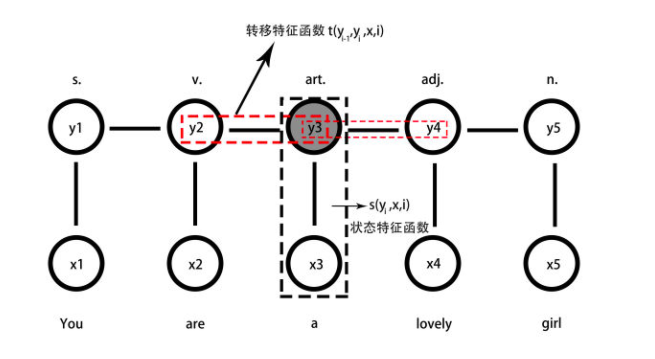

通过一个词性标注问题讲解特征函数

啥是词性标注问题？

非常简单的，就是给一个句子中的每个单词注明词性。比如这句话：“Bob drank coffee at Starbucks”，注明每个单词的词性后是这样的：“Bob (名词) drank(动词) coffee(名词) at(介词) Starbucks(名词)”。

下面，就用条件随机场来解决这个问题。

以上面的话为例，有5个单词，我们将：(名词，动词，名词，介词，名词)作为一个标注序列，称为l，可选的标注序列有很多种，比如l还可以是这样：（名词，动词，动词，介词，名词），我们要在这么多的可选标注序列中，挑选出一个最靠谱的作为我们对这句话的标注。

怎么判断一个标注序列靠谱不靠谱呢？

就我们上面展示的两个标注序列来说，第二个显然不如第一个靠谱，因为它把第二、第三个单词都标注成了动词，动词后面接动词，这在一个句子中通常是说不通的。

假如我们给每一个标注序列打分，打分越高代表这个标注序列越靠谱，我们至少可以说，凡是标注中出现了动词后面还是动词的标注序列，要给它负分！！

上面所说的**动词后面还是动词就是一个特征函数**，我们可以定义一个特征函数集合，用这个特征函数集合来为一个标注序列打分，并据此选出最靠谱的标注序列。也就是说，每一个特征函数都可以用来为一个标注序列评分，把集合中所有特征函数对同一个标注序列的评分综合起来，就是这个标注序列最终的评分值。


现在，我们正式地定义一下什么是CRF中的特征函数，所谓特征函数，就是这样的函数，它接受四个参数：

1. 句子s（就是我们要标注词性的句子）
2. i，用来表示句子s中第i个单词
3. l_i，表示要评分的标注序列给第i个单词标注的词性
4. l_i-1，表示要评分的标注序列给第i-1个单词标注的词性

它的输出值是0或者1,0表示要评分的标注序列不符合这个特征，1表示要评分的标注序列符合这个特征。

### 基本问题

条件随机场包含概率计算问题、学习问题和预测问题三个问题。

> 1. 概率计算问题：已知模型的所有参数，计算观测序列 $Y$ 出现的概率，常用方法：前向和后向算法；

> 2. 学习问题：已知观测序列 $Y$，求解使得该观测序列概率最大的模型参数，包括隐状态序列、隐状态间的转移概率分布和从隐状态到观测状态的概率分布，常用方法：Baum-Wehch 算法；

> 3. 预测问题：一直模型所有参数和观测序列 $Y$ ，计算最可能的隐状态序列 $X$,常用算法：维特比算法。

#### 概率计算问题

> 给定条件随机场$P(Y|X)$，输入序列 $x$ 和 输出序列 $y$;

> 计算条件概率

$$
    P(Y_i=y_i|x), P(Y_{i-1} = y_{i-1},Y_i = y_i|x)
$$

> 计算相应的数学期望问题；

##### 前向-后向算法

###### step 1 前向计算

对观测序列 $x$ 的每个位置 $i=1,2,...,n+1$ ，定义一个 $m$ 阶矩阵（$m$ 为标记$Y_i$取值的个数）

 <img src="img/前向后向10.png" width = "350" height = "200" alt="图片名称" align=center />

对每个指标 $i=0,1,...,n+1$，定义前向向量 $\alpha_{i}(x)$，则递推公式:

 <img src="img/前向后向1.png" width = "450" height = "200" alt="图片名称" align=center />

其中，

 <img src="img/前向后向2.png" width = "250" height = "200" alt="图片名称" align=center />
 
 

###### step 2 后向计算

对每个指标 $i=0,1,...,n+1$，定义前向向量 $\beta_{i}(x)$，则递推公式:

<img src="img/前向后向3.png" width = "350" height = "200" alt="图片名称" align=center />
 
<img src="img/前向后向4.png" width = "350" height = "200" alt="图片名称" align=center />


###### step 3

 <img src="img/前向后向5.png" width = "250" height = "200" alt="图片名称" align=center />

###### step 4 概率计算

所以，标注序列在位置 $i$ 是标注 $y_i$ 的条件概率为：

<img src="img/前向后向6.png" width = "350" height = "200" alt="图片名称" align=center />
 
<img src="img/前向后向7.png" width = "500" height = "200" alt="图片名称" align=center />

其中，

<img src="img/前向后向8.png" width = "150" height = "200" alt="图片名称" align=center />

###### step 5 期望值计算

通过利用前向-后向向量，计算特征函数关于联合概率分布 $P(X,Y)$ 和 条件概率分布 $P(Y|X)$ 的数学期望，即特征函数 $f_k$ 关于条件概率分布 $P(Y|X)$ 的数学期望：

<img src="img/前向后向9.png" width = "500" height = "200" alt="图片名称" align=center />

其中：

<img src="img/前向后向8.png" width = "150" height = "200" alt="图片名称" align=center />


#### 学习问题

这里主要介绍一下 BFGS 算法的思路。


   输入：特征函数 $f_1,f_2,...,f_n$：经验分布 $\widetilde{P}(X,Y)$；
   
   输出：最优参数值 $\widehat{w}$，最优模型$P_{\widehat{w}}(y|x)$。
   
   1. 选定初始点 w^{(0)}， 取 $B_0$ 为正定对称矩阵，k = 0;
   2. 计算 $g_k = g(w^(k))$，若 $g_k = 0$ ，则停止计算，否则转 (3) ；
   3. 利用 $B_k p_k = -g_k$ 计算 $p_k$；
   4. 一维搜索：求 $\lambda_k$使得
   
   <img src="img/学习问题1.png" width = "300" height = "200" alt="图片名称" align=center />
   
   5. 设 $w^{(k+1)} = w^{(k)} + \lambda_k * p_k$
   6. 计算 $g_{k+1}$ = g(w^{(k+1)}),
   
       若 $g_k = 0$， 则停止计算；否则，利用下面公式计算 $B_{k+1}$:
       
       <img src="img/学习问题2.png" width = "300" height = "200" alt="图片名称" align=center />
       
   7. 令 $k=k+1$，转步骤（3）；


#### 预测问题

对于预测问题，常用的方法是维特比算法，其思路如下：

输入：模型特征向量 $F(y,x)$ 和权重向量 $w$，输入序列（观测序列） $x={x_1,x_2,...,x_n}$；

输出：条件概率最大的输出序列（标记序列）$y^{*}= (y_1^*,y_2^*,...,y_n^*)$，也就是最优路径；

1. 初始化

<img src="img/预测1.png" width = "350" height = "200" alt="图片名称" align=center />
  
2. 递推，对$i=2,3,...,n$

<img src="img/预测2.png" width = "450" height = "200" alt="图片名称" align=center />

3. 终止

<img src="img/预测3.png" width = "200" height = "200" alt="图片名称" align=center />

4. 返回路径

<img src="img/预测4.png" width = "350" height = "200" alt="图片名称" align=center />

求得最优路径 $y^{*}= (y_1^*,y_2^*,...,y_n^*)$

##### 例子说明

利用维特比算法计算给定输入序列$x$ 对应的最优输出序列$y^*$：

<img src="img/预测5.png" width = "200" height = "200" alt="图片名称" align=center />

1. 初始化

<img src="img/预测6.png" width = "350" height = "200" alt="图片名称" align=center />
  
2. 递推，对$i=2,3,...,n$

<img src="img/预测11.png" width = "450" height = "200" alt="图片名称" align=center />

<img src="img/预测8.png" width = "500" height = "200" alt="图片名称" align=center />

3. 终止

<img src="img/预测9.png" width = "350" height = "200" alt="图片名称" align=center />

4. 返回路径

<img src="img/预测10.png" width = "200" height = "200" alt="图片名称" align=center />

求得最优路径 $y^{*}= (y_1^*,y_2^*,...,y_n^*) = (1,2,1)$

In [1]:
import numpy as np
 
class CRF(object):
    '''实现条件随机场预测问题的维特比算法
    '''
    def __init__(self, V, VW, E, EW):
        '''
        :param V:是定义在节点上的特征函数，称为状态特征
        :param VW:是V对应的权值
        :param E:是定义在边上的特征函数，称为转移特征
        :param EW:是E对应的权值
        '''
        self.V  = V  #点分布表
        self.VW = VW #点权值表
        self.E  = E  #边分布表
        self.EW = EW #边权值表
        self.D  = [] #Delta表，最大非规范化概率的局部状态路径概率
        self.P  = [] #Psi表，当前状态和最优前导状态的索引表s
        self.BP = [] #BestPath，最优路径
        return 
        
    def Viterbi(self):
        '''
        条件随机场预测问题的维特比算法，此算法一定要结合CRF参数化形式对应的状态路径图来理解，更容易理解.
        '''
        self.D = np.full(shape=(np.shape(self.V)), fill_value=.0)
        self.P = np.full(shape=(np.shape(self.V)), fill_value=.0)
        for i in range(np.shape(self.V)[0]):
            #初始化
            if 0 == i:
                self.D[i] = np.multiply(self.V[i], self.VW[i])
                self.P[i] = np.array([0, 0])
                print('self.V[%d]='%i, self.V[i], 'self.VW[%d]='%i, self.VW[i], 'self.D[%d]='%i, self.D[i])
                print('self.P:', self.P)
                pass
            #递推求解布局最优状态路径
            else:
                for y in range(np.shape(self.V)[1]): #delta[i][y=1,2...]
                    for l in range(np.shape(self.V)[1]): #V[i-1][l=1,2...]
                        delta = 0.0
                        delta += self.D[i-1, l]                      #前导状态的最优状态路径的概率
                        delta += self.E[i-1][l,y]*self.EW[i-1][l,y]  #前导状态到当前状体的转移概率
                        delta += self.V[i,y]*self.VW[i,y]            #当前状态的概率
                        print('(x%d,y=%d)-->(x%d,y=%d):%.2f + %.2f + %.2f='%(i-1, l, i, y, \
                              self.D[i-1, l], \
                              self.E[i-1][l,y]*self.EW[i-1][l,y], \
                              self.V[i,y]*self.VW[i,y]), delta)
                        if 0 == l or delta > self.D[i, y]:
                            self.D[i, y] = delta
                            self.P[i, y] = l
                    print('self.D[x%d,y=%d]=%.2f\n'%(i, y, self.D[i,y]))
        print('self.Delta:\n', self.D)
        print('self.Psi:\n', self.P)
        
        #返回，得到所有的最优前导状态
        N = np.shape(self.V)[0]
        self.BP = np.full(shape=(N,), fill_value=0.0)
        t_range = -1 * np.array(sorted(-1*np.arange(N)))
        for t in t_range:
            if N-1 == t:#得到最优状态
                self.BP[t] = np.argmax(self.D[-1])
            else: #得到最优前导状态
                self.BP[t] = self.P[t+1, int(self.BP[t+1])]
        
        #最优状态路径表现在存储的是状态的下标，我们执行存储值+1转换成示例中的状态值
        #也可以不用转换，只要你能理解，self.BP中存储的0是状态1就可以~~~~
        self.BP += 1
        
        print('最优状态路径为：', self.BP)
        return self.BP
        
def CRF_manual():   
    S = np.array([[1,1],   #X1:S(Y1=1), S(Y1=2)
                  [1,1],   #X2:S(Y2=1), S(Y2=2)
                  [1,1]])  #X3:S(Y3=1), S(Y3=1)
    SW = np.array([[1.0, 0.5], #X1:SW(Y1=1), SW(Y1=2)
                   [0.8, 0.5], #X2:SW(Y2=1), SW(Y2=2)
                   [0.8, 0.5]])#X3:SW(Y3=1), SW(Y3=1)
    E = np.array([[[1, 1],  #Edge:Y1=1--->(Y2=1, Y2=2)
                   [1, 0]], #Edge:Y1=2--->(Y2=1, Y2=2)
                  [[0, 1],  #Edge:Y2=1--->(Y3=1, Y3=2) 
                   [1, 1]]])#Edge:Y2=2--->(Y3=1, Y3=2)
    EW= np.array([[[0.6, 1],  #EdgeW:Y1=1--->(Y2=1, Y2=2)
                   [1, 0.0]], #EdgeW:Y1=2--->(Y2=1, Y2=2)
                  [[0.0, 1],  #EdgeW:Y2=1--->(Y3=1, Y3=2)
                   [1, 0.2]]])#EdgeW:Y2=2--->(Y3=1, Y3=2)
    
    crf = CRF(S, SW, E, EW)
    ret = crf.Viterbi()
    print('最优状态路径为:', ret)
    return
    
if __name__=='__main__':
    CRF_manual()


self.V[0]= [1 1] self.VW[0]= [1.  0.5] self.D[0]= [1.  0.5]
self.P: [[0. 0.]
 [0. 0.]
 [0. 0.]]
(x0,y=0)-->(x1,y=0):1.00 + 0.60 + 0.80= 2.4000000000000004
(x0,y=1)-->(x1,y=0):0.50 + 1.00 + 0.80= 2.3
self.D[x1,y=0]=2.40

(x0,y=0)-->(x1,y=1):1.00 + 1.00 + 0.50= 2.5
(x0,y=1)-->(x1,y=1):0.50 + 0.00 + 0.50= 1.0
self.D[x1,y=1]=2.50

(x1,y=0)-->(x2,y=0):2.40 + 0.00 + 0.80= 3.2
(x1,y=1)-->(x2,y=0):2.50 + 1.00 + 0.80= 4.3
self.D[x2,y=0]=4.30

(x1,y=0)-->(x2,y=1):2.40 + 1.00 + 0.50= 3.9000000000000004
(x1,y=1)-->(x2,y=1):2.50 + 0.20 + 0.50= 3.2
self.D[x2,y=1]=3.90

self.Delta:
 [[1.  0.5]
 [2.4 2.5]
 [4.3 3.9]]
self.Psi:
 [[0. 0.]
 [0. 0.]
 [1. 0.]]
最优状态路径为： [1. 2. 1.]
最优状态路径为: [1. 2. 1.]
